<a href="https://colab.research.google.com/github/beifa/ML-models/blob/master/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

Алгоритм K-средних - это метод для автоматической группировки похожих примеров данных. Конкретно, вам дают обучающий набор {x (1), ⋯, x (m)} (где x (i) ∈Rn), и вы хотите сгруппировать данные в несколько связных «кластеров». 

Интуиция, лежащая в основе K-средних, - это итеративная процедура, которая начинается с угадывания начальных центроидов, а затем уточняет это предположение, неоднократно присваивая примеры их ближайшим центроидам, а затем повторно вычисляя центроиды на основе назначений.

Внутренний цикл алгоритма многократно выполняет два шага:

(1) назначение каждого обучающего примера x (i) его ближайшему центроиду и 
(2) пересчет среднего значения каждого центроида с использованием назначенных ему точек. 
Алгоритм K-средних всегда будет сходиться к некоторому окончательному набору

**Поэтому на практике алгоритм K-средних обычно запускается несколько раз с разными случайными инициализациями.**

In [0]:
X, y = make_blobs(n_samples=50, centers=3, n_features=2, random_state=13)

###K-Means

#### Random initialization

In [0]:
def findcentroids(X, K):
    """
    initializes K centroids 
    X: data
    K: int, count centroids

    return: array, centroid   
    """
    m, n = X.shape 
    centroids = np.zeros((K, n))   
    # Randomly 
    randidx = np.random.permutation(X.shape[0])    
    centroids = X[randidx[:K], :]        
    return centroids

centroid = findcentroids(X, 3)

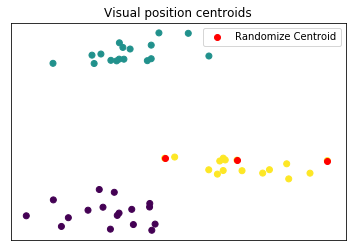

In [0]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.scatter(centroid[:, 0], centroid[:, 1], c = 'r', label = 'Randomize Centroid')
plt.title('Visual position centroids')
plt.xticks(())
plt.yticks(())
plt.legend();

#### Find idx(data) by gen centroid 

In [0]:
def findidx_centroid(X, centroid):
  """
  Find index values in data by centroid

  Param:
  ------
  X: array, data
  centroid: array, data random centroid

  Note:

  dist = X-centroid, sum, **2
  после нахождения дистанции нам нужно понять
  к какому центройду это значение отнести(как я понимаю),
  ага мы из каждого x вычитаем центройды, ложим их в баночку в которой значения
  и взяв аргмин получем индекс наминьшего.
  """
  centroid_temp = np.zeros((centroid.shape[0]))
  idx = np.zeros((X.shape[0]))
  for i in range(X.shape[0]):
    for c in range(len(centroid)):
      temp = np.sum((X[i, :] - centroid[c])**2)
      centroid_temp[c] = temp

    #print(centroid_temp)
    #we find dist and i need small 
    """
    [20.68896308 87.42547432  1.30672695]
    [  9.08243129 235.73546631  42.02063509]
    [  5.55775    167.29055971  24.26477923]    
    """
    idx[i] = np.argmin(centroid_temp)
  return idx

idx = findidx_centroid(X, centroid)

In [0]:
k1 = X[idx == 1]
k2 = X[idx == 2]
k0 = X[idx == 0]

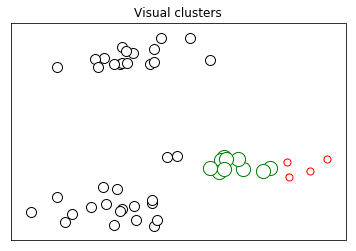

In [0]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.scatter(k1[:, 0], k1[:, 1], c = 'w', edgecolors='g', s=200)
plt.scatter(k2[:, 0], k2[:, 1], c = 'w', edgecolors='k', s=100)
plt.scatter(k0[:, 0], k0[:, 1], c = 'w', edgecolors='r', s=50)
plt.title('Visual clusters')
plt.xticks(())
plt.yticks(());

#### Find best position centroid

In [0]:
def meancentroid(X, idx, K):
    """
    Returns the new centroids by means change points assigned to each centroid.    
    Param:
    ------
    X : data    
    idx : array, index data for each centroid    
    K : num clusters    
    Returns: new position centroid  
    """    
    m, n = X.shape    
    centroids = np.zeros((K, n))   
    for k in range(K):
      new_c = X[np.where(idx == k)].mean(axis = 0)
      centroids[k] = new_c        
    return centroids

In [0]:
new_centroid = meancentroid(X, idx, 3)

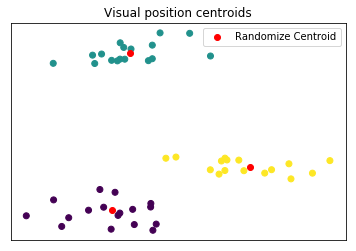

In [0]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.scatter(new_centroid[:, 0], new_centroid[:, 1], c = 'r', label = 'Randomize Centroid')
plt.title('Visual position centroids')
plt.xticks(())
plt.yticks(())
plt.legend();

#### Reindex(data) by new position centroid

In [0]:
idx = findidx_centroid(X, new_centroid)

In [0]:
k1 = X[idx == 1]
k2 = X[idx == 2]
k0 = X[idx == 0]

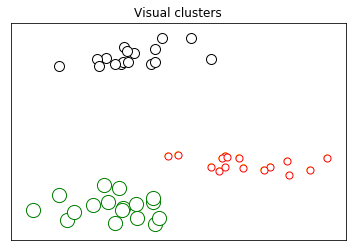

In [0]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.scatter(k1[:, 0], k1[:, 1], c = 'w', edgecolors='g', s=200)
plt.scatter(k2[:, 0], k2[:, 1], c = 'w', edgecolors='k', s=100)
plt.scatter(k0[:, 0], k0[:, 1], c = 'w', edgecolors='r', s=50)
plt.title('Visual clusters')
plt.xticks(())
plt.yticks(());

#### Test

In [0]:
def history_edu(X, centroid, func1, func2, max_iter = 5):
  """
  we want to see how our algorithm studied (moving centroids)
  Param:
  ------
  X: data
  centroid: random init centroids
  func1: find index data by centroid
  func2: change position by mean func1
  max_iter:  steps
  """
  h_idx = []
  h_centroids = []
  K = centroid.shape[0]

  for i in range(max_iter):
    #print(centroid)
    #find idx
    idx = func1(X, centroid)
    #save to history
    h_idx.append(idx)
    h_centroids.append(centroid)
    #mean    
    centroid = func2(X, idx, K)
  return centroid, np.asarray(h_centroids)

In [0]:
#gen random position centroids
centroid = findcentroids(X, 3)
#return best centroid and history
centroids, h_centroids = history_edu(X, centroid, findidx_centroid, meancentroid, max_iter = 5)

In [0]:
def plot_cluster(X, centroids, h_centroids):
  """plot cluster centroid with steps
  """
  idx = findidx_centroid(X, centroids)
  k1 = X[idx == 1]
  k2 = X[idx == 2]
  k0 = X[idx == 0]

  plt.scatter(X[:, 0], X[:, 1], c = y)
  plt.scatter(k1[:, 0], k1[:, 1], c = 'w', edgecolors='g', s=200)
  plt.scatter(k2[:, 0], k2[:, 1], c = 'w', edgecolors='k', s=100)
  plt.scatter(k0[:, 0], k0[:, 1], c = 'w', edgecolors='r', s=50)
  #steps
  K = h_centroids[0].shape[0]
  for i in range(K):
    for k, color in enumerate(['red', 'green', 'k']):
      current = np.stack([c[k, :] for c in h_centroids[:i+1]], axis=0)
      #print(current)
      plt.plot(current[:, 0], current[:, 1],'-X',color = color, mec='k',lw=1, ms=10, mew=1)
  plt.title('Visual Steps how find best place clusters')
  plt.xticks(())
  plt.yticks(())
  plt.show()

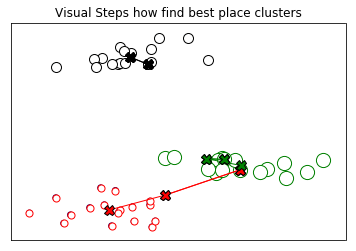

In [0]:
plot_cluster(X, centroids, h_centroids)

#### Test sklearn

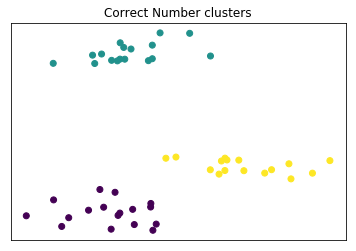

In [0]:
clusters = KMeans(n_clusters=3, random_state=13).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.title("Correct Number clusters")
plt.xticks(())
plt.yticks(())
plt.show()